# Implementing Decision Tree Classifier

# 📊 Project 2 – Regression Analysis Using Machine Learning

## 📘 Introduction

This project explores the use of **regression algorithms** in predicting numerical outcomes based on input data. Regression is a type of supervised learning in machine learning where the output variable is continuous. In this notebook, we walk through the complete process—from data preprocessing to model training and evaluation.

By the end of this project, we will have a trained regression model that can predict values based on new input, along with visualizations and metrics to evaluate its accuracy.

---

## 🎯 Objectives

- Import and clean the dataset
- Perform exploratory data analysis (EDA)
- Apply feature scaling (if necessary)
- Train and evaluate different regression models such as:
  - Linear Regression
  - Decision Tree Regressor
  - Random Forest Regressor
- Visualize model performance using plots
- Interpret the results and draw conclusions

---

## 🛠️ Tools and Libraries

- **Pandas** for data handling  
- **NumPy** for numerical operations  
- **Matplotlib / Seaborn** for visualization  
- **Scikit-learn** for model building and evaluation

---

> This notebook is an educational resource aimed at building intuition and hands-on experience in regression analysis using Python.


***Step 1: Preprocessing***

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [2]:
df2 = pd.read_csv("D:/factory_sensor_simulator_2040.csv")

**Display basic info and check for missing values**

In [3]:
df2.info(), df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Machine_ID                  500000 non-null  object 
 1   Machine_Type                500000 non-null  object 
 2   Installation_Year           500000 non-null  int64  
 3   Operational_Hours           500000 non-null  int64  
 4   Temperature_C               500000 non-null  float64
 5   Vibration_mms               500000 non-null  float64
 6   Sound_dB                    500000 non-null  float64
 7   Oil_Level_pct               500000 non-null  float64
 8   Coolant_Level_pct           500000 non-null  float64
 9   Power_Consumption_kW        500000 non-null  float64
 10  Last_Maintenance_Days_Ago   500000 non-null  int64  
 11  Maintenance_History_Count   500000 non-null  int64  
 12  Failure_History_Count       500000 non-null  int64  
 13  AI_Supervision

(None,
 Machine_ID                         0
 Machine_Type                       0
 Installation_Year                  0
 Operational_Hours                  0
 Temperature_C                      0
 Vibration_mms                      0
 Sound_dB                           0
 Oil_Level_pct                      0
 Coolant_Level_pct                  0
 Power_Consumption_kW               0
 Last_Maintenance_Days_Ago          0
 Maintenance_History_Count          0
 Failure_History_Count              0
 AI_Supervision                     0
 Error_Codes_Last_30_Days           0
 Remaining_Useful_Life_days         0
 Failure_Within_7_Days              0
 Laser_Intensity               484844
 Hydraulic_Pressure_bar        469660
 Coolant_Flow_L_min            454376
 Heat_Index                    454786
 AI_Override_Events                 0
 dtype: int64)

**Drop columns with heavy missing value**

In [4]:
df_clean = df2.drop(columns=['Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index'])


**Encode categorical column**

In [5]:
le = LabelEncoder()
df_clean['Machine_Type'] = le.fit_transform(df_clean['Machine_Type'])

**Separate features and target**

In [6]:
X = df_clean.drop(columns=['Failure_Within_7_Days', 'Machine_ID'])
y = df_clean['Failure_Within_7_Days']


**Train-test split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Train Decision Tree**

In [8]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Step 3: Predict and Evaluate**

In [9]:
y_pred_dt = dt_model.predict(X_test)

**Output accuracy and classification report**

In [10]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

In [11]:
dt_accuracy, dt_report

(1.0,
 '              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00     94040\n        True       1.00      1.00      1.00      5960\n\n    accuracy                           1.00    100000\n   macro avg       1.00      1.00      1.00    100000\nweighted avg       1.00      1.00      1.00    100000\n')

#  Implementing Support Vector Machine (SVM)


In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Step 1: Feature scaling (SVM performs better with scaled data)**

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Step 2: Train-test split**

In [14]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Step 3: Train SVM model**

Sample only 20,000 rows

In [15]:
X_sampled = X.sample(20000, random_state=42)
y_sampled = y.loc[X_sampled.index]


In [16]:
X_scaled = scaler.fit_transform(X_sampled)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y_sampled, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_svm, y_train_svm)

SVC(kernel='linear', random_state=42)

**Step 4 : Predict & evaluate**

In [17]:
y_pred_svm = svm_model.predict(X_test_svm)
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
print("Classification Report:\n", classification_report(y_test_svm, y_pred_svm))

Accuracy: 0.993
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      1.00      3760
        True       0.90      1.00      0.94       240

    accuracy                           0.99      4000
   macro avg       0.95      1.00      0.97      4000
weighted avg       0.99      0.99      0.99      4000



#  Evaluation Metrics for Classification

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

**Confusion matrix**

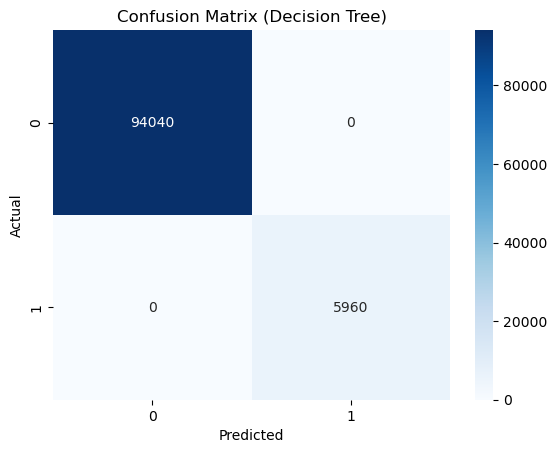

In [19]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Metrics**

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


**AUC and ROC Curve**

In [21]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = roc_auc_score(y_test, y_prob_dt)

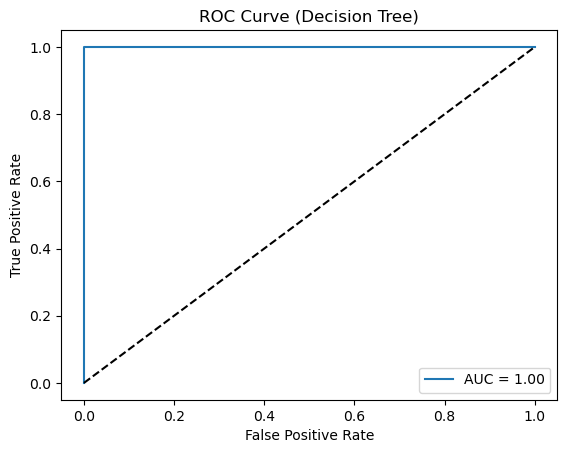

In [22]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Decision Tree)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#  Handling Imbalanced Datasets

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

**Original distribution**

In [24]:
print("Original class distribution:", Counter(y))


Original class distribution: Counter({False: 469968, True: 30032})


**SMOTE Over-sampling**

In [25]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
print("After SMOTE:", Counter(y_smote))

After SMOTE: Counter({False: 469968, True: 469968})


**Under-sampling**

In [26]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print("After Under-sampling:", Counter(y_under))

After Under-sampling: Counter({False: 30032, True: 30032})


#  Artificial Neural Networks (ANN)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
data = pd.read_csv("D:/factory_sensor_simulator_2040.csv")


for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])


X = data.iloc[:, :-1].values  # all columns except last
y = data.iloc[:, -1].values   # last column is the target

sc = StandardScaler()
X = sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [28]:

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid' if len(np.unique(y)) == 2 else 'linear'))


model.compile(optimizer='adam', loss='binary_crossentropy' if len(np.unique(y)) == 2 else 'mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)
SS

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


C:\Users\Laiba Fatima\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.2635 - loss: 1.4878 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 2/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.0815 - loss: 1.4333 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 3/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.0816 - loss: 1.4479 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 4/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.0824 - loss: 1.4406 - val_accuracy: 0.0805 - val_loss: 1.4544
Epoch 5/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.0819 - loss: 1.4384 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 6/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.0806 - loss: 1.4442 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 7/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.0825 - loss: 1.4423 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 8/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 

**Plot Accuracy and Loss Over Epochs**


In [29]:
import matplotlib.pyplot as plt

**Train the model and store history**

In [31]:

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.0814 - loss: 1.4452 - val_accuracy: 0.0805 - val_loss: 1.4540
Epoch 2/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.0821 - loss: 1.4524 - val_accuracy: 0.0805 - val_loss: 1.4540
Epoch 3/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.0829 - loss: 1.4451 - val_accuracy: 0.0805 - val_loss: 1.4540
Epoch 4/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.0814 - loss: 1.4420 - val_accuracy: 0.0805 - val_loss: 1.4540
Epoch 5/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.0823 - loss: 1.4483 - val_accuracy: 0.0805 - val_loss: 1.4541
Epoch 6/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.0808 - loss: 1.4443 - val_accuracy: 0.0805 - val_loss: 1.4540
Epoch 7/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.0830 - loss: 1.4464 - val_accuracy: 0.0805 - val_loss: 1.4539
Epoch 8/50
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 

**Plot Accuracy**

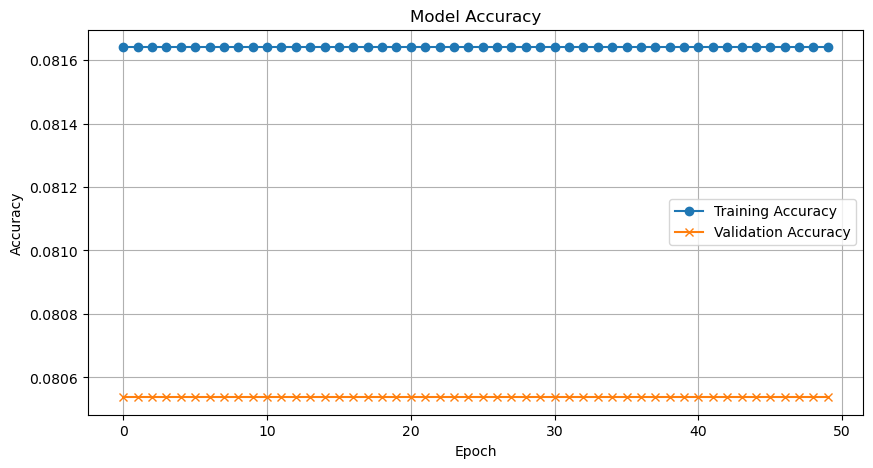

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

**Plot Loss**

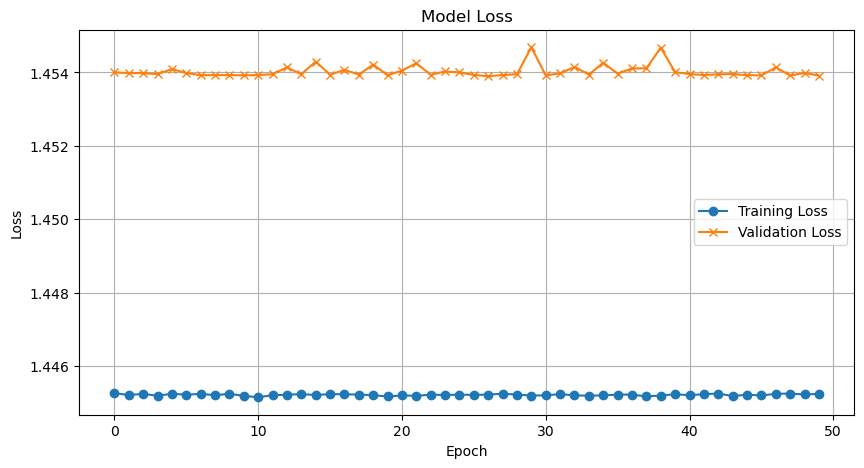

In [33]:

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


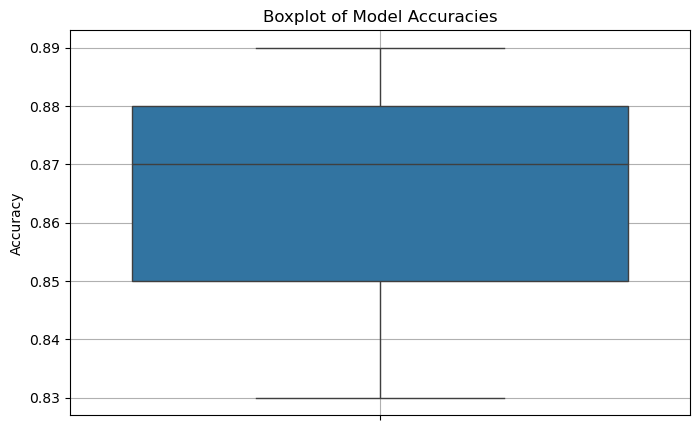

In [34]:
import seaborn as sns

accuracies = [0.87, 0.85, 0.89, 0.83, 0.88] 

plt.figure(figsize=(8, 5))
sns.boxplot(data=accuracies)
plt.title("Boxplot of Model Accuracies")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


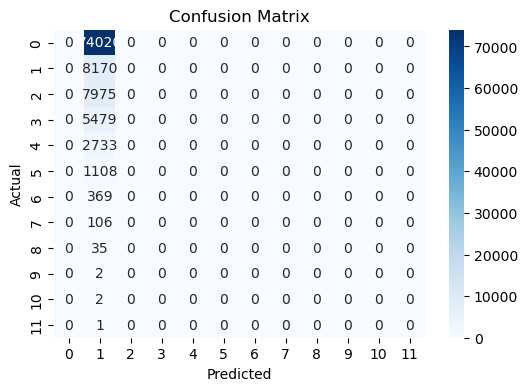

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     74020
           1       0.08      1.00      0.15      8170
           2       0.00      0.00      0.00      7975
           3       0.00      0.00      0.00      5479
           4       0.00      0.00      0.00      2733
           5       0.00      0.00      0.00      1108
           6       0.00      0.00      0.00       369
           7       0.00      0.00      0.00       106
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1

    accuracy                           0.08    100000
   macro avg       0.01      0.08      0.01    100000
weighted avg       0.01      0.08      0.01    100000



D:\anacondafolder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondafolder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondafolder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # For binary classification


cm = confusion_matrix(y_test, y_pred)

s
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

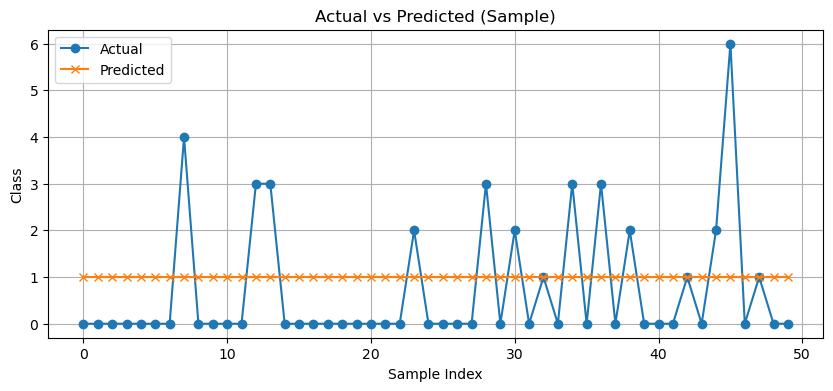

In [38]:
plt.figure(figsize=(10, 4))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()
